# 챗봇 만들기

### https://jfun.tistory.com/199?category=851249
### https://www.slideshare.net/KimSungdong1/20170227-72644192

In [1]:
input_data = '판교에 지금 주문해줘'
output_data = ''

request = {
    "intent_id":"",
    "input_data":input_data,
    "request_type":"text",
    "story_slot_entity":{},
    "output_data":output_data
}

## 기본 데이터 셋(DB))

In [2]:
intent_list = {
    "주문":["주문", "배달"],
    "예약":["예약", "잡아줘"],
    "정보":["정보","알려"]
}

story_slot_entity = {"주문":{"메뉴":None, "장소":None, "날짜":None},
"예약":{"장소": None, "날짜":None},
"정보":{"대상":None}
}

## 형태소 분석

In [3]:
from eunjeon import Mecab
mecab = Mecab()
preprocessed = mecab.pos(request.get('input_data'))

print(preprocessed)

[('판교', 'NNG'), ('에', 'JKB'), ('지금', 'MAG'), ('주문', 'NNG'), ('해', 'XSV+EC'), ('줘', 'VX+EC')]


## Intent 도출(Ruled Based)

In [4]:
# Char CNN을 사용해서 연결하면 좀 더 쉽게 만들 수 있다
intent_id = "주문"
slot_value = story_slot_entity.get("주문")

## NER 도출(Ruled based)

In [5]:
# LSTM 기법을 사용해서 연결하면 좀 더 쉬울 수 있다
menu_list = ["피자", "햄버거", "치킨"]
loc_list = ["판교", "야탑", "서현"]
date_list = ["지금", '내일', '모레']

## Dictionary 기반 slot 구성

In [6]:
for pos_tag in preprocessed:
    if pos_tag[1] in ['NNG', 'NNP', 'SL', 'MAG']:
        if pos_tag[0] in menu_list:
            slot_value['메뉴'] = pos_tag[0]
        elif pos_tag[0] in loc_list:
            slot_value['장소'] = pos_tag[0]
        elif pos_tag[0] in date_list:
            slot_value['날짜'] = pos_tag[0]


print(story_slot_entity.get('주문'))

{'메뉴': None, '장소': '판교', '날짜': '지금'}


## 빈 slot 검색

In [7]:
if None in slot_value.values():
    key_values=""
    for key in slot_value.keys():
        if slot_value[key] is None:
            key_values = key_values + key + ""
    output_data = key_values + "선택해주세요"
else:
    output_data="주문이 완료 되었습니다."

print(output_data)

메뉴선택해주세요


In [8]:
response = {
    "intent_id":"",
    "input_data":input_data,
    "request_type":"text",
    "story_slot_entity":{},
    "output_data":""
}

response["output_data"]=output_data

print(response["output_data"])

메뉴선택해주세요


# Word Representation

In [9]:
ona_data = [
    ['안녕', '만나서 반가워'],
    ['넌 누구니','나는 AI봇이란다.'],
    ['피자 주문할께', '음료도 주문해줘'],
    ['음료는 뭘로', '콜라로 해줘']
]

train_gata = list(map(lambda x: mecab.morphs(''.join(x)), ona_data))

import itertools

train_data = list(itertools.chain.from_iterable(train_gata))

print(list(train_data))

['안녕', '만나', '서', '반가워', '넌', '누구', '니', '나', '는', 'AI', '봇', '이', '란다', '.', '피자', '주문', '할께', '음료', '도', '주문', '해', '줘', '음료', '는', '뭘로', '콜라', '로', '해', '줘']


In [10]:
import numpy as np

bucket = np.zeros(len(train_data), dtype=np.float)
print(bucket)

for word in train_data:
    bucket_temp = bucket.copy()
    bucket_temp = np.insert(bucket_temp, train_data.index(word), 1)
    print(bucket_temp)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.


# Word2Vec

In [11]:
from gensim.models import word2vec

train_data = [train_data]
print(train_data)

model = word2vec.Word2Vec(size=50, window=2, min_count=1)
model.build_vocab(train_data)
model.train(train_data, epochs=model.iter,total_examples=model.corpus_count)
print("model check:{0}".format(model))

[['안녕', '만나', '서', '반가워', '넌', '누구', '니', '나', '는', 'AI', '봇', '이', '란다', '.', '피자', '주문', '할께', '음료', '도', '주문', '해', '줘', '음료', '는', '뭘로', '콜라', '로', '해', '줘']]
model check:Word2Vec(vocab=24, size=50, alpha=0.025)


In [12]:
import os
model.save(r"E:\Programming\python\NLP\howls_nlp\Chatbot\자료\models\w2v.bin")
model = word2vec.Word2Vec.load(r"E:\Programming\python\NLP\howls_nlp\Chatbot\자료\models\w2v.bin")
print("model load check : {0}".format(model))

model load check : Word2Vec(vocab=24, size=50, alpha=0.025)


In [36]:
vocab = model.wv.index2word
X = model[vocab]
print(model.wv.index2word)

['는', '주문', '음료', '해', '줘', '안녕', '만나', '서', '반가워', '넌', '누구', '니', '나', 'AI', '봇', '이', '란다', '.', '피자', '할께', '도', '뭘로', '콜라', '로']


In [16]:
print(model["안녕"])

[-0.00065337  0.0032915   0.00731512  0.00152106 -0.00338048  0.00936381
 -0.00614295 -0.00866278 -0.00021987 -0.00751348  0.00510069  0.00116923
 -0.00014547 -0.0098279   0.00959107 -0.00077539 -0.0014325  -0.0023903
  0.00740389  0.00168241 -0.00510244 -0.00279708  0.00348713 -0.00803259
  0.0022518   0.00440094 -0.00268104  0.0057333   0.00925341  0.0017627
 -0.00808826 -0.00167314  0.00473477 -0.00135725  0.00450835  0.00921548
  0.00624827  0.00752992  0.00472613  0.00384259 -0.00558561 -0.0069657
 -0.000337   -0.00970172 -0.0063238  -0.0005453  -0.00216016  0.002204
  0.00079088  0.00842363]


In [17]:
print(model["AI"])

[-6.7051100e-03  3.4749100e-03 -7.8624524e-03 -7.3517743e-03
  7.9879966e-03  9.5368363e-03 -8.8668456e-03 -1.0110758e-03
 -3.7656953e-03  9.7560426e-03 -4.3843186e-04  5.5289286e-04
  8.2662608e-03 -3.3839822e-03 -2.3097850e-03 -7.9606008e-03
  6.0138297e-03 -9.1348197e-03 -4.1340603e-03 -8.3030937e-03
 -4.8751747e-03  1.7692229e-03  2.5843855e-03 -1.8755256e-03
 -3.1916308e-03 -9.9509833e-03 -7.3737996e-03  4.5817853e-03
 -5.5686268e-03 -2.5631003e-03 -9.8419013e-03  7.6122470e-03
  3.2655559e-03  7.4797249e-03 -8.9968601e-03 -7.8320391e-03
 -1.9465693e-03 -2.8874541e-03  2.4098589e-03 -1.3217749e-03
 -2.1139465e-03 -3.3691113e-03  3.2208602e-05  1.5149413e-03
 -7.9452163e-03 -2.3124276e-03 -8.1009017e-03  9.1278274e-03
 -1.5967340e-03  2.5295245e-04]


In [18]:
res1 = model.most_similar(positive="누구", negative="", topn=10)
print(res1)

[('서', 0.29675987362861633), ('도', 0.2572103440761566), ('주문', 0.1627185046672821), ('는', 0.09738282114267349), ('란다', 0.09516383707523346), ('만나', 0.080685093998909), ('이', 0.07729511708021164), ('봇', 0.06776342540979385), ('반가워', 0.022914836183190346), ('.', 0.017276128754019737)]


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
            x          y word
0  -20.721655 -14.333797    는
1   32.506218 -45.693287   주문
2  -33.324867 -31.586437   음료
3  -35.538128  22.122507    해
4   53.187733  17.914452    줘
5   31.804943  17.656918   안녕
6   54.118591  -5.895360   만나
7   32.917225  -2.162659    서
8   14.066603 -32.262356  반가워
9   13.340059  27.930819    넌
10 -41.211990  -4.495268   누구
11  32.506462 -22.049171    니
12   5.041284  47.331814    나
13 -20.679153   6.786255   AI
14 -12.783925 -43.342548    봇
15  -3.602477 -24.113514    이
16  52.665295 -29.821205   란다
17 -15.572395  35.072830    .
18  33.530563  40.098587   피자
19  13.977795   7.188174   할께
20  -3.021863  -3.375639    도
21   8.237351 -52.809071   뭘로
22  -3.873580  17.564375   콜라
23  14.281427 -12.242959    로


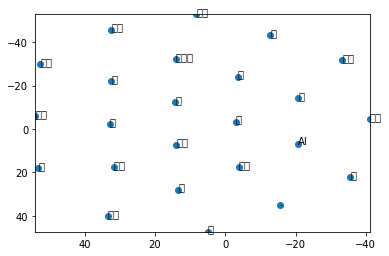

In [37]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

font_name = matplotlib.font_manager.FontProperties(
    fname=r"C:\Program Files\Android\Android Studio\plugins\android\lib\layoutlib\data\fonts\NanumGothic.ttf"
).get_name()
vocab = model.wv.index2word
matplotlib.rc('font', family=font_name)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.concat([pd.DataFrame(X_tsne), pd.Series(vocab)], axis=1)

df.columns = ['x', 'y', 'word']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
print(df)
ax.scatter(df['x'], df['y'])
ax.set_xlim(df['x'].max(), df['x'].min())
ax.set_ylim(df['y'].max(), df['y'].min())
for i, txt in enumerate(df['word']):
    ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))
plt.show()

# 딥러닝 이용

## Intent와 NER 모델을 만들기 위한 dataset 구성 방법

### 피자주문, 숙소예약, 여행정보의 각각의 Entity구성 (서비스시에는 Entity는 별도 DB로 구성)
### Entity 별 N by N의 수로 정제된 Text를 구할 수 있음

In [1]:
train_data_order = ['판교에 오늘 피자 주문해줘']
train_data_reserve = ['오늘 날짜에 호텔 예약 해줄래']
train_data_info = ['모레 날짜의 판교 여행 정보 알려줘']

get_data_list = train_data_info[0]

dict_entity = {
    'date' : ['오늘', '내일', '모레'],
    'loc' : ['판교', '야탑'],
    'menu' : ['피자', '햄버거'],
    'hotel' : ['호텔', '여관', '민박'],
    'travel' : ['여행', '관광', '카페']
}

length = 1
for key in list(dict_entity.keys()):
    length = length * len(dict_entity[key])
print("Augmentation length is {0}".format(length))

Augmentation length is 108


## 형태소 분석

In [2]:
from eunjeon import Mecab
mecab = Mecab()
morphed_txt = mecab.pos(get_data_list)
print(morphed_txt)

[('모레', 'MAG'), ('날짜', 'NNG'), ('의', 'JKG'), ('판교', 'NNG'), ('여행', 'NNG'), ('정보', 'NNG'), ('알려줘', 'VV+EC+VX+EC')]


## Feature Engineering(명사만 도출)
#### FE로 intent와 NER 정확도를 높임

### 일반명사(NNG)[메뉴]
### 고유명사(NNP)[지역]
### 영어(SL)[Pizza]
### 사건부사(MAG)[오늘, 내일, 모레]

In [3]:
tagged_txt = ''
for pos_tag in morphed_txt:
    # Noun만 Check하기
    if (pos_tag[1] in ['NNG', 'MAG', 'NNP', 'SL'] and len(pos_tag[0]) > 1):
        feature_value = pos_tag[0]
        tagged_txt = tagged_txt + pos_tag[0] + ' '
print(tagged_txt)

모레 날짜 판교 여행 정보 


## Intent 학습 Data 구성

### Intent 성능 향상을 위해 parse한 Text Data를 represent화 함 

In [4]:
pattern = ''
for word in tagged_txt.split(' '):
    entity = list(filter(lambda key:word in dict_entity[key], list(dict_entity.keys())))
    if len(entity) > 0:
        pattern = pattern + 'tag' + entity[0] + ' '
    else:
        pattern = pattern + word + ' '
print(pattern)

tagdate 날짜 tagloc tagtravel 정보  


## Data augmentation (Entity and Pattern)

### 각 의도별 Pattern text를 entity N의 배수로 Augmenatiation 작업

In [5]:
def augmenntation_pattern(pattern, dict_entity):
    # 입력된 패턴을 리스트로 바꿈
    aug_pattern = pattern.split(' ')
    # augment된 텍스트 리스트
    augmented_text_list = []
    # copy를 위한 임시 list
    temp_aug = []
    for i in range(0, len(aug_pattern)):
        # entity에 해당하는 값일 경우 entity list를 가져옴
        if aug_pattern[i].find("tag") > -1:
            dict_list = dict_entity[aug_pattern[i].replace("tag", "")]
            # 각 entity 별로 값을 append하면서 pattern 구성
            for j in range(0, len(dict_list)):
                # 최초 entity 값은 그냥 추가만 함
                if i == 0:
                    augmented_text_list.append(dict_list[j] + ' ')
                elif j == 1:
                    augmented_text_list = list(filter(lambda word:len(word.split(' ')) == i + 1, augmented_text_list))
                    copy_data_order = augmented_text_list * (len(dict_list) - 2)
                    augmented_text_list = list(map(lambda x:x + dict_list[j] + " ", augmented_text_list))
                    augmented_text_list = augmented_text_list + temp_aug + copy_data_order
                else:
                    # List의 수를 체크하여 값을 추가
                    temp_aug = list(filter(lambda word:len(word.split(' ')) == i + 1, augmented_text_list))
                    temp_aug = list(map(lambda x:x + dict_list[j] + ' ', temp_aug))
                    # 추가된 list를 위해 기존 값 제거
                    if j != 0:
                        augmented_text_list = augmented_text_list[0:len(augmented_text_list) - len(temp_aug)]
                        augmented_text_list = augmented_text_list + temp_aug
        # entity 추가 대상이 아닌 경우 패턴만 추가
        else:
            augmented_text_list = list(map(lambda x:x + aug_pattern[i] + " ", augmented_text_list))
        # N*N으로 증가시키기 위한 list
        temp_aug = augmented_text_list

    return augmented_text_list

In [6]:
augmented_text_list = augmenntation_pattern(pattern, dict_entity)
augmented_text_list

['오늘 날짜 야탑 관광 정보   ',
 '내일 날짜 야탑 관광 정보   ',
 '모레 날짜 야탑 관광 정보   ',
 '오늘 날짜 판교 관광 정보   ',
 '내일 날짜 판교 관광 정보   ',
 '모레 날짜 판교 관광 정보   ',
 '오늘 날짜 야탑 여행 정보   ',
 '내일 날짜 야탑 여행 정보   ',
 '모레 날짜 야탑 여행 정보   ',
 '오늘 날짜 판교 여행 정보   ',
 '내일 날짜 판교 여행 정보   ',
 '모레 날짜 판교 여행 정보   ',
 '오늘 날짜 야탑 카페 정보   ',
 '내일 날짜 야탑 카페 정보   ',
 '모레 날짜 야탑 카페 정보   ',
 '오늘 날짜 판교 카페 정보   ',
 '내일 날짜 판교 카페 정보   ',
 '모레 날짜 판교 카페 정보   ']

## BIO Tagging

In [11]:
def augmentation_bio_pattern(pattern, dict_entity):
    # 입력되 패턴을 리스트로 바꿈
    aug_pattern = pattern.split(' ')
    # augment된 텍스트 리스트
    augmented_text_list = []
    # copy를 위한 임시 list
    temp_aug = []
    for i in range(0, len(aug_pattern)):
        # entity에 해당하는 값일 경우 entity list를 가져옴
        if aug_pattern[i].find("tag") > -1:
            dict_list = dict_entity[aug_pattern[i].replace("tag", "")]
            bio_tag = aug_pattern[i].replace("tag", 'B_')
            # 각 entity 별로 값을 append하면서 pattern 구성
            for j in range(0, len(dict_list)):
                # 최초 entity 값은 그냥 추가만 함
                if i == 0:
                    augmented_text_list.append(bio_tag + ' ')
                elif j == 1:
                    augmented_text_list = list(filter(lambda word:len(word.split(' ')) == i + 1, augmented_text_list))
                    copy_data_order = augmented_text_list * (len(dict_list) - 2)
                    augmented_text_list = list(map(lambda x:x + bio_tag + " ", augmented_text_list))
                    augmented_text_list = augmented_text_list + temp_aug + copy_data_order
                else:
                    # List의 수를 체크하여 값을 추가
                    temp_aug = list(filter(lambda word:len(word.split(' ')) == i + 1, augmented_text_list))
                    temp_aug = list(map(lambda x:x + bio_tag + ' ', temp_aug))
                    # 추가된 list를 위해 기존 값 제거
                    if j != 0:
                        augmented_text_list = augmented_text_list[0:len(augmented_text_list) - len(temp_aug)]
                        augmented_text_list = augmented_text_list + temp_aug
        # entity 추가 대상이 아닌 경우 패턴만 추가
        else:
            augmented_text_list = list(map(lambda x:x + aug_pattern[i] + " ", augmented_text_list))
        # N*N으로 증가시키기 위한 list
        temp_aug = augmented_text_list

    return augmented_text_list

In [12]:
bio_list = augmentation_bio_pattern(pattern, dict_entity)
bio_list

['B_date 날짜 B_loc B_travel 정보   ',
 'B_date 날짜 B_loc B_travel 정보   ',
 'B_date 날짜 B_loc B_travel 정보   ',
 'B_date 날짜 B_loc B_travel 정보   ',
 'B_date 날짜 B_loc B_travel 정보   ',
 'B_date 날짜 B_loc B_travel 정보   ',
 'B_date 날짜 B_loc B_travel 정보   ',
 'B_date 날짜 B_loc B_travel 정보   ',
 'B_date 날짜 B_loc B_travel 정보   ',
 'B_date 날짜 B_loc B_travel 정보   ',
 'B_date 날짜 B_loc B_travel 정보   ',
 'B_date 날짜 B_loc B_travel 정보   ',
 'B_date 날짜 B_loc B_travel 정보   ',
 'B_date 날짜 B_loc B_travel 정보   ',
 'B_date 날짜 B_loc B_travel 정보   ',
 'B_date 날짜 B_loc B_travel 정보   ',
 'B_date 날짜 B_loc B_travel 정보   ',
 'B_date 날짜 B_loc B_travel 정보   ']

## NER을 위한 Full Text 확보

#### tag entity를 NER 학습을 위한 Labeled Entity로 변환(Bi-LSTM 학습을 위함)

In [14]:
ner_train_text = [augmented_text_list, bio_list]
ner_train_text

[['오늘 날짜 야탑 관광 정보   ',
  '내일 날짜 야탑 관광 정보   ',
  '모레 날짜 야탑 관광 정보   ',
  '오늘 날짜 판교 관광 정보   ',
  '내일 날짜 판교 관광 정보   ',
  '모레 날짜 판교 관광 정보   ',
  '오늘 날짜 야탑 여행 정보   ',
  '내일 날짜 야탑 여행 정보   ',
  '모레 날짜 야탑 여행 정보   ',
  '오늘 날짜 판교 여행 정보   ',
  '내일 날짜 판교 여행 정보   ',
  '모레 날짜 판교 여행 정보   ',
  '오늘 날짜 야탑 카페 정보   ',
  '내일 날짜 야탑 카페 정보   ',
  '모레 날짜 야탑 카페 정보   ',
  '오늘 날짜 판교 카페 정보   ',
  '내일 날짜 판교 카페 정보   ',
  '모레 날짜 판교 카페 정보   '],
 ['B_date 날짜 B_loc B_travel 정보   ',
  'B_date 날짜 B_loc B_travel 정보   ',
  'B_date 날짜 B_loc B_travel 정보   ',
  'B_date 날짜 B_loc B_travel 정보   ',
  'B_date 날짜 B_loc B_travel 정보   ',
  'B_date 날짜 B_loc B_travel 정보   ',
  'B_date 날짜 B_loc B_travel 정보   ',
  'B_date 날짜 B_loc B_travel 정보   ',
  'B_date 날짜 B_loc B_travel 정보   ',
  'B_date 날짜 B_loc B_travel 정보   ',
  'B_date 날짜 B_loc B_travel 정보   ',
  'B_date 날짜 B_loc B_travel 정보   ',
  'B_date 날짜 B_loc B_travel 정보   ',
  'B_date 날짜 B_loc B_travel 정보   ',
  'B_date 날짜 B_loc B_travel 정보   ',
  'B_date 날짜 B_loc B_travel 정보   ',
  'B_date

### 위에서 얻은 Data를 토데로 Intent와 NER 모델을 얻기 위해 학습시킬 수 있음